remain

2.5 6-7

2.6 2-8

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from hw1_skeleton_code import *


# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2.1

### NOTE
  When feature values differ greatly, we can get much slower rates of convergence of gradient-based algorithms. Furthermore, when we start using regularization, features with larger values can have a much greater effect on the final output for the same regularization cost – in effect, features with larger values become more important once we start regularizing. One common approach to feature normalization is to linearly transform (i.e. shift and rescale) each feature so that all feature values in the training set are in [0, 1]. Each feature gets its own transformation. We then apply the same transformations to each feature on the test set. It’s important that the transformation is “learned” on the training set, and then applied to the test set. It is possible that some transformed test set values will lie outside the [0, 1] interval.

## 2.2

#### 1~4
$$ J(\theta) = \frac{1}{2m}(y - X\theta)^{T}(y - X\theta) $$

$$ \nabla_{\theta} J(\theta) = \frac{1}{m}X^{T}(X\theta - y) $$

$$ J(\theta+\eta \Delta) - J(\theta) = \nabla_{\theta}J(\theta)\eta\Delta $$

$$ \theta_{t+1} = \theta_{t} - \eta \nabla_{\theta}J(\theta) $$

#### 5~8

In [149]:
y_test = np.array([10, 5])
X_test = np.array([[2,4],
                   [3,6]])
theta_test = np.array([2,2])

print(compute_square_loss(X_test, y_test, theta_test))
print(compute_square_loss_gradient(X_test, y_test, theta_test))

43.25
[21.5 43. ]


## 2.3
#### 1~2

In [150]:
print(grad_checker(X_test, y_test, theta_test))
print(generic_gradient_checker(X_test, y_test, theta_test, compute_square_loss, compute_square_loss_gradient))

True
True


## 2.4
#### 1
#### 2

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


/Applications/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/yaojian/ds_ga1003/hw1-sgd/hw1_skeleton_code.py:51: RuntimeWarning: overflow encountered in square
  loss = 0 #initialize the square_loss


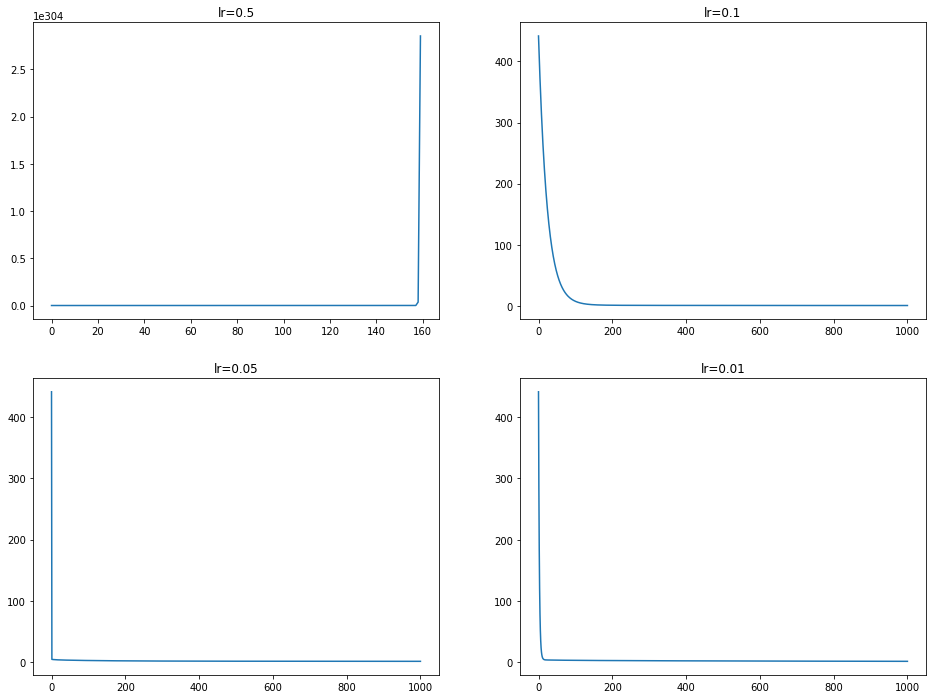

In [246]:
X_train, y_train, X_test, y_test = main()
step_ops = [.5, .1, .05, .01]

plt.figure(figsize=(16, 12))

for i, alpha in enumerate(step_ops):
    theta_hist, loss_hist = batch_grad_descent(X_train, y_train, alpha=alpha)
    plt.subplot(2, 2, i+1)
    plt.plot(list(range(len(loss_hist))), loss_hist)
    plt.title("lr={}".format(alpha))
plt.show()

  The figures above shows that a large value of learning rate will lead to exploding gradient. A appropriate learning rate(not too large nor too small) will make the algorithm converge fast.

#### 3

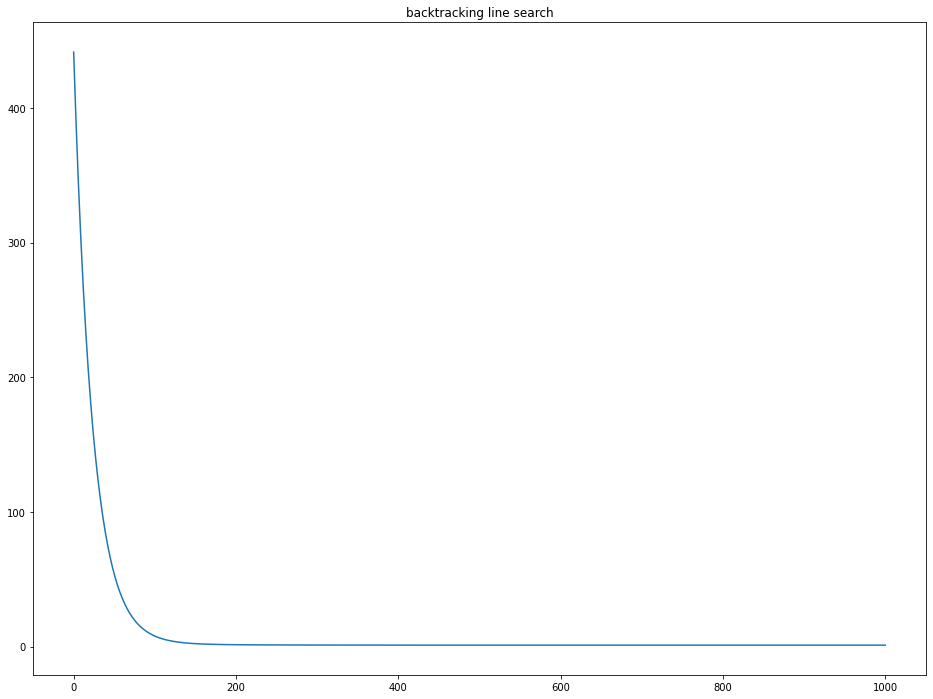

In [289]:
plt.figure(figsize=(16, 12))

theta_hist, loss_hist = batch_grad_descent(X_train, y_train, alpha=alpha, backtracking_line_search=True)
compute_square_loss(X_test, y_test, theta_hist[-1])
plt.plot(list(range(len(loss_hist))), loss_hist)
plt.title("backtracking line search")
plt.show()

## 2.5

#### 1, 4

$$
J(\theta) = \frac{1}{2m}(y-X\theta)^T(y-X\theta) + \lambda \theta^T\theta \\
\nabla J(\theta) = \frac{1}{m}X^T(X\theta - y) + 2\lambda \theta^T\theta
$$

If B is large, then to get the same value of bias * $\theta_0$, we only need the small value of $\theta_0$, so the term in regularization $\lambda \theta_0^2$ is small, which means to obtain the same value of intercept term, the penalty of second way is small. 

The penalty of $\theta_0$ is $\lambda \theta_0^2$, and if we want it smaller than $\epsilon$: $\lambda \theta_0^2 < \epsilon$, we can let $\hat B>\sqrt{\frac{\epsilon}{\lambda}}B\theta_0$, so that we only need the small $\hat \theta_0< \sqrt{\frac{\lambda}{\epsilon}}$ to get the same value of intercept term.

#### 2~3

/Applications/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


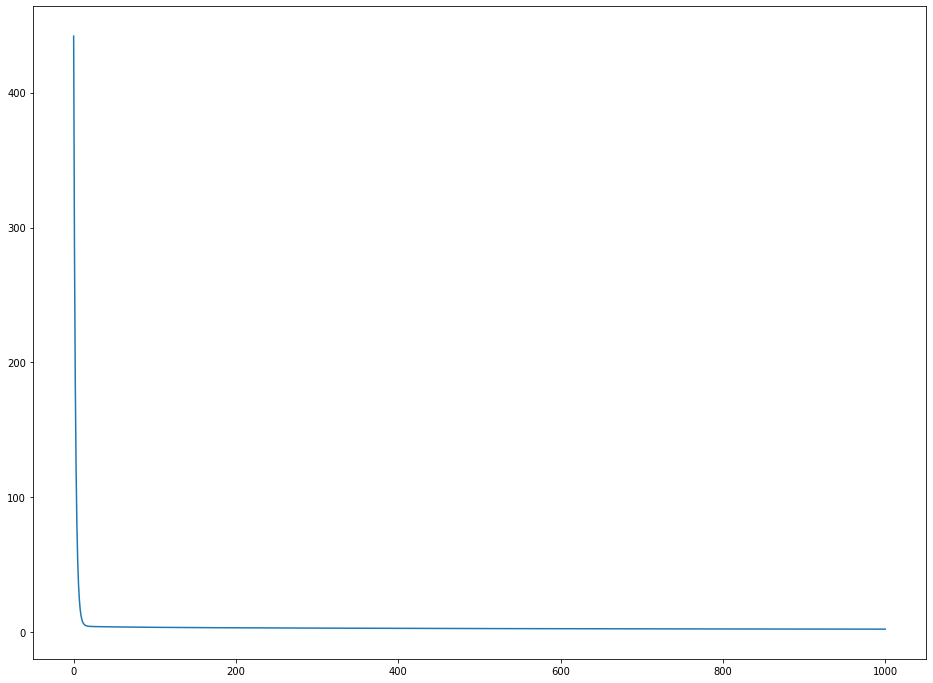

In [248]:
# 2

compute_regularized_square_loss_gradient(X_train, y_train, np.ones(X_train.shape[1]), lambda_reg = 0.1)

# 3
plt.figure(figsize=(16, 12))
theta_hist, loss_hist = regularized_grad_descent(X_train, y_train, alpha=alpha, lambda_reg=0.01)
plt.plot(list(range(len(loss_hist))), loss_hist)
plt.show()

#### 5

/Applications/miniconda3/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


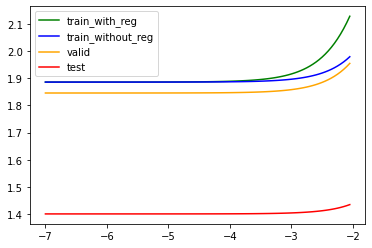

In [301]:
alpha = 0.01

lambdas = [10**val for val in np.arange(-7, -2, 0.05)]
# lambdas = [1e-7,1e-5, 1e-3, 1e-1]
res = {}
for lam in lambdas:
    theta, loss = regularized_grad_descent(data_x_train, data_y_train, alpha=alpha, lambda_reg=lam)
    
    train_loss = compute_square_loss(data_x_train, data_y_train, theta[-1])
    valid_loss = compute_square_loss(data_x_valid, data_y_valid, theta[-1])
    test_loss = compute_square_loss(X_test, y_test, theta[-1])
    
    res[lam] = [loss[-1], train_loss.copy(), valid_loss.copy(), test_loss.copy()]

plt.plot([np.log10(val) for val in lambdas], [res[val][0] for val in lambdas], c="g", label="train_with_reg")
plt.plot([np.log10(val) for val in lambdas], [res[val][1] for val in lambdas], c="b", label="train_without_reg")
plt.plot([np.log10(val) for val in lambdas], [res[val][2] for val in lambdas], c="orange", label="valid")

plt.plot([np.log10(val) for val in lambdas], [res[val][3] for val in lambdas], c="r", label="test")
plt.legend()
plt.show()

#### 8
I will choose the theta based on the performance both on train and valid set. However, the data/code seems strange in this hw.

## 2.6
#### 1

SGD:
$$
\nabla J(\theta) = \frac{1}{m}X_{batch}^T(X_{batch}\theta-y_{batch}) \\
\theta_{t+1} = \theta_t - \alpha \nabla J(\theta)
$$


# 3
## 3.1


#### 1

$$
\begin{align}
R(f) &= E_{x,y}l(f(x),y) \\
     &=\frac{1}{2}E_{x,y}(y-f(x))^2 \\
     &=\frac{1}{2}E_{x}E_{y|x}(y-f(x))^2
\end{align}
$$

for a fixed x, f(x) can be regraded as a const number related to x, say it c. So the term $E_{y|x}(y-c)^2$ take the minimum when c equals to E(y|x). Since in more general case:
$$ E(y-c)^2 = E(y^2) - 2cE(y) + c^2 $$ 
which is a quadratic function of c and is easy to obtain the minimum point.

#### 2

Similar to 1, we have,
$$ R(f) =\frac{1}{2}E_{x}E_{y|x}|y-f(x)| $$
it is reduced to minimize E_{y|x}|y-f(x)| for fixed x.